In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# <span style='background:yellow'>Auditory clusters<span>

In [12]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/Three_Auditory_clusters_2.csv')
df

,Timing.level,Cluster.1,Timing.level2,Cluster.2,Timing.level3,Cluster.3
0,Single duration timing,0.64,Single duration timing,0.90,Single duration timing,0.79
1,Single duration timing,0.60,Single duration timing,0.74,Single duration timing,0.90
2,Single duration timing,0.64,Single duration timing,0.81,Single duration timing,0.79
3,Single duration timing,0.76,Single duration timing,0.67,Single duration timing,0.79
4,Single duration timing,0.88,Single duration timing,0.88,Single duration timing,0.79
...,...,...,...,...,...,...
112,NaN,NaN,NaN,NaN,Beat-based timing,0.60
113,NaN,NaN,NaN,NaN,Beat-based timing,0.63
114,NaN,NaN,NaN,NaN,Beat-based timing,0.57
115,NaN,NaN,NaN,NaN,Beat-based timing,0.50


In [13]:
import re
# def change(df):
#     re.findall(r'\d+', df)
# #     for i in :
#         df['Cluster']='cluster'+str(i)
#         df.rename(columns={df.iloc[:,0]:'Timing.level',df.iloc[:,1]:'value'})
df1=df.iloc[:,:2].dropna()
df1['Cluster']='cluster1'
df1.rename(columns={'Cluster.1':'value'},inplace=True)
df2=df.iloc[:,2:4].dropna()
df2['Cluster']='cluster2'
df2.rename(columns={'Cluster.2':'value','Timing.level2':'Timing.level'},inplace=True)
df3=df.iloc[:,4:6].dropna()
df3['Cluster']='cluster3'
df3.rename(columns={'Cluster.3':'value','Timing.level3':'Timing.level'},inplace=True)
df_final=pd.concat([df1,df2,df3],axis=0).reset_index(drop=True)
df_final

,Timing.level,value,Cluster
0,Single duration timing,0.64,cluster1
1,Single duration timing,0.60,cluster1
2,Single duration timing,0.64,cluster1
3,Single duration timing,0.76,cluster1
4,Single duration timing,0.88,cluster1
...,...,...,...
298,Beat-based timing,0.60,cluster3
299,Beat-based timing,0.63,cluster3
300,Beat-based timing,0.57,cluster3
301,Beat-based timing,0.50,cluster3


<Figure size 300x400 with 0 Axes>

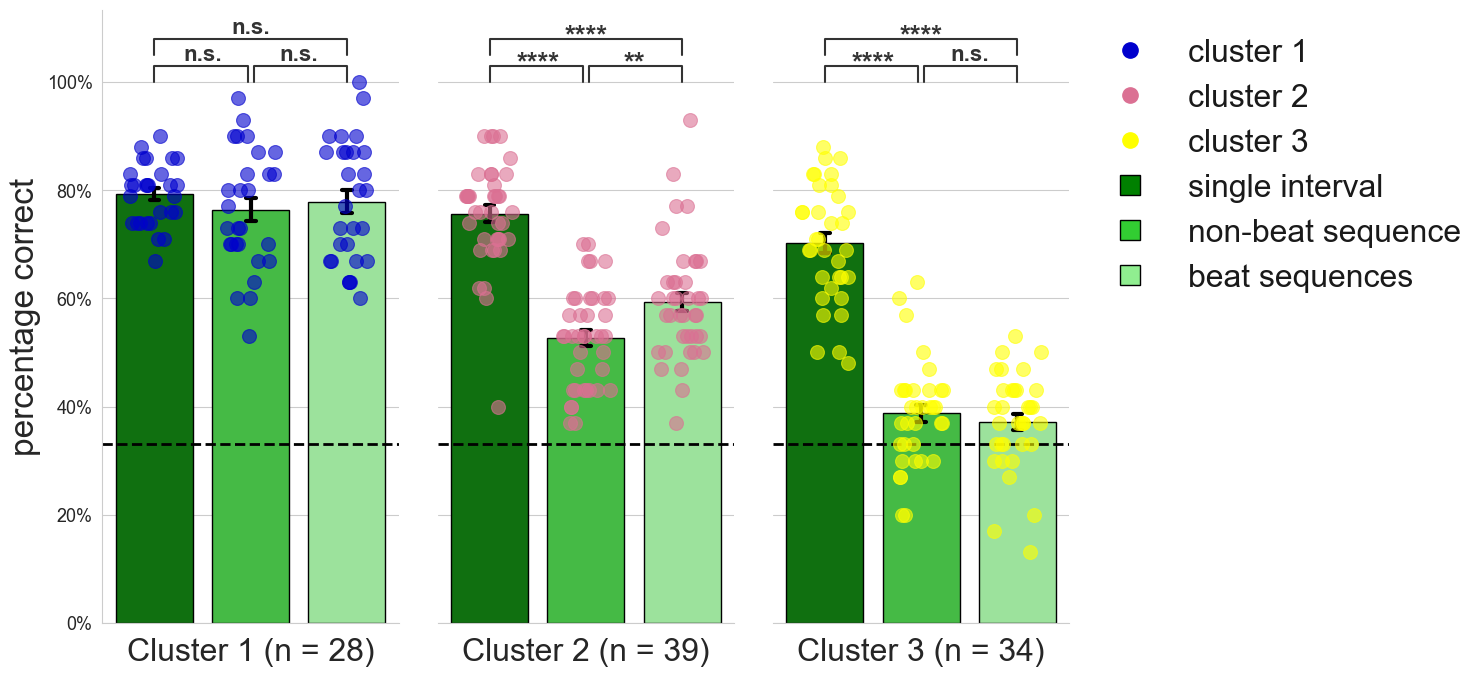

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))

############# plot #############
g=sns.catplot(data=df_final,x='Timing.level',y='value',kind='bar',col='Cluster', col_order=['cluster2','cluster3','cluster1'],
              errorbar='se', palette=['green','limegreen','lightgreen'],edgecolor="black",
               errcolor="black", errwidth=3, capsize = 0.1, height=7, aspect=0.5,alpha=1,
              legend=False, sharey=True, sharex=True, margin_titles=False)
colors = ['mediumblue', 'palevioletred', 'yellow']  # Example markers for the first, second, and third axes

for i, ax in enumerate(g.axes.flat):
    cluster_name = g.col_names[i]
    sns.stripplot(ax=ax, x='Timing.level', y='value', data=df_final[df_final['Cluster'] == cluster_name],
                  dodge=True, jitter=0.25, alpha=0.6, ec=colors[i], linewidth=0.8, size=10, color=colors[i])

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","percentage correct",size=24)
g.set_titles('')
g.axes[0,0].set_xlabel('Cluster 1 (n = 28)',alpha=1,size=23)
g.axes[0,1].set_xlabel('Cluster 2 (n = 39)',alpha=1,size=23)
g.axes[0,2].set_xlabel('Cluster 3 (n = 34)',alpha=1,size=23)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
# g.fig.suptitle('Auditory clusters',size=25, y=1.05)
sns.despine(ax=g.axes[0, 1], left=True)
sns.despine(ax=g.axes[0, 2], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,2].axhline(y=0.33, color='black', linestyle='--',lw=2)

############## legend ################
new_labels = ['cluster 1', 'cluster 2', 'cluster 3','single interval', 'non-beat sequence','beat sequences']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['mediumblue', 'palevioletred', 'yellow', 'green','limegreen','lightgreen']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor=color, markersize=11) if idx < 3
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=14)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=23, labelcolor='0.1', title='',title_fontsize=16)

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  

from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
max_val=max(df_final['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.04, s='n.s.',ha='center',size=16,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.09, s='n.s.',ha='center',size=16,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=16,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.02, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.02, s='**',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,2].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=0.5,y=max_val+0.02, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,2].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,2].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,2].text(x=1.5,y=max_val+0.04, s='n.s.',ha='center',size=16,weight='bold',color='0.2')

### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/auditory_clusters_barplot.png'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/auditory_clusters_barplot.png', bbox_inches='tight',dpi=400)
plt.show()


# <span style='background:yellow'>Visual clusters<span>

In [25]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/Two_Visual_clusters_2.csv')
df.head(3)

,Timing.level,Cluster.1,Timing.level2,Cluster.2
0,Single duration timing,0.57,Single duration timing,0.76
1,Single duration timing,0.57,Single duration timing,0.76
2,Single duration timing,0.57,Single duration timing,0.71


In [26]:
import re
# def change(df):
#     re.findall(r'\d+', df)
# #     for i in :
#         df['Cluster']='cluster'+str(i)
#         df.rename(columns={df.iloc[:,0]:'Timing.level',df.iloc[:,1]:'value'})
df1=df.iloc[:,:2].dropna()
df1['Cluster']='cluster1'
df1.rename(columns={'Cluster.1':'value'},inplace=True)
df2=df.iloc[:,2:4].dropna()
df2['Cluster']='cluster2'
df2.rename(columns={'Cluster.2':'value','Timing.level2':'Timing.level'},inplace=True)
df_final=pd.concat([df1,df2],axis=0).reset_index(drop=True)
df_final

,Timing.level,value,Cluster
0,Single duration timing,0.57,cluster1
1,Single duration timing,0.57,cluster1
2,Single duration timing,0.57,cluster1
3,Single duration timing,0.64,cluster1
4,Single duration timing,0.62,cluster1
...,...,...,...
298,Beat-based timing,0.60,cluster2
299,Beat-based timing,0.40,cluster2
300,Beat-based timing,0.40,cluster2
301,Beat-based timing,0.43,cluster2


<Figure size 300x400 with 0 Axes>

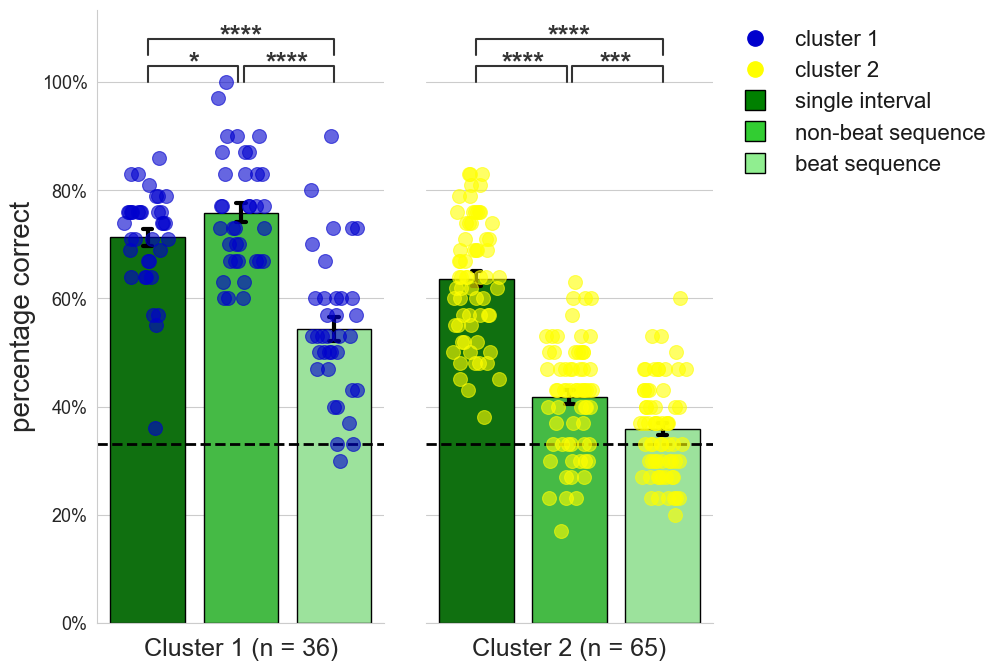

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))

############# plot #############
g=sns.catplot(data=df_final,x='Timing.level',y='value',kind='bar',col='Cluster',col_order=['cluster2','cluster1'],errorbar='se', 
              palette=['green','limegreen','lightgreen'],edgecolor="black",
               errcolor="black", errwidth=3, capsize = 0.1, height=7, aspect=0.5,alpha=1,
              legend=False, sharey=True, sharex=True, margin_titles=False)
colors = ['mediumblue', 'yellow']  # Example markers for the first, second, and third axes

for i, ax in enumerate(g.axes.flat):
    cluster_name = g.col_names[i]
    sns.stripplot(ax=ax, x='Timing.level', y='value', data=df_final[df_final['Cluster'] == cluster_name],
                  dodge=True, jitter = 0.25 ,alpha=0.6, ec=colors[i], linewidth=0.8, size=10, color=colors[i])

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","percentage correct",size=20)
g.set_titles('')
g.axes[0,0].set_xlabel('Cluster 1 (n = 36)',alpha=1,size=18)
g.axes[0,1].set_xlabel('Cluster 2 (n = 65)',alpha=1,size=18)
g.set_titles(row_template='{row_name}',col_template='{col_name}')
g.set_titles("")
# g.fig.suptitle('Visual clusters',size=25, y=1.05)
sns.despine(ax=g.axes[0, 1], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)

############## legend ################
new_labels = ['cluster 1', 'cluster 2','single interval', 'non-beat sequence','beat sequence']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['mediumblue', 'yellow', 'green','limegreen','lightgreen']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor=color, markersize=11) if idx < 2
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=14)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=16, labelcolor='0.1', title='',title_fontsize=16)

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  

from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
max_val=max(df_final['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.02, s='*',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.02, s='****',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.02, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.02, s='***',ha='center',size=20,weight='bold',color='0.2')

# tif_path = 'E:\\My own PhD papers\\First project\\paper figures\\Two visual clusters.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600) 


### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/visual_clusters_barplot.png', bbox_inches='tight',dpi=400)
plt.show()
